## Import

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import font_manager
import seaborn as sns

## Fonts

In [2]:
# Font
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

## Read csv

In [3]:
# Read csv

# encoding cp949
data = pd.read_csv('./temp/fire.csv', encoding='cp949', sep=',')

data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트)


## 날짜 파싱

In [4]:
# 년-월-일 표기
data['onlyDay'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m-%d')

# 년-월 표기
data['onlyMonth'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m')

# 일 표기
data['day'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%d')

# 1. 월 별 사망 사고 비율
## 데이터 전처리 [ Fix ]

In [5]:
# 달별 합계
df_sumByMonth = data.groupby(data['onlyMonth']).sum()

# 화재 발생 회수 카운트
df_cntFireOccur= data['화재발생년월일'].groupby(data['onlyMonth']).count()

In [6]:
df_sumByMonth['발생회수'] = data['onlyMonth'].groupby(data['onlyMonth']).count()

In [7]:
# 히트맵용 데이터 프레임 - 화재 발생과 사망자, 부상자 간의 상관 관계

dfOccCor = pd.DataFrame()

dfOccCor = dfOccCor.append(df_sumByMonth['발생회수'])
dfOccCor = dfOccCor.append(df_sumByMonth['사망'])
dfOccCor = dfOccCor.append(df_sumByMonth['부상'])
dfOccCor

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
발생회수,4430.0,3413.0,4267.0,3611.0,3990.0,2862.0,2956.0,2888.0,2703.0,2797.0,2949.0,3237.0
사망,35.0,38.0,29.0,30.0,24.0,12.0,15.0,21.0,21.0,16.0,19.0,25.0
부상,236.0,161.0,240.0,150.0,198.0,139.0,180.0,176.0,209.0,144.0,168.0,229.0


## 시각화 ( Graph )

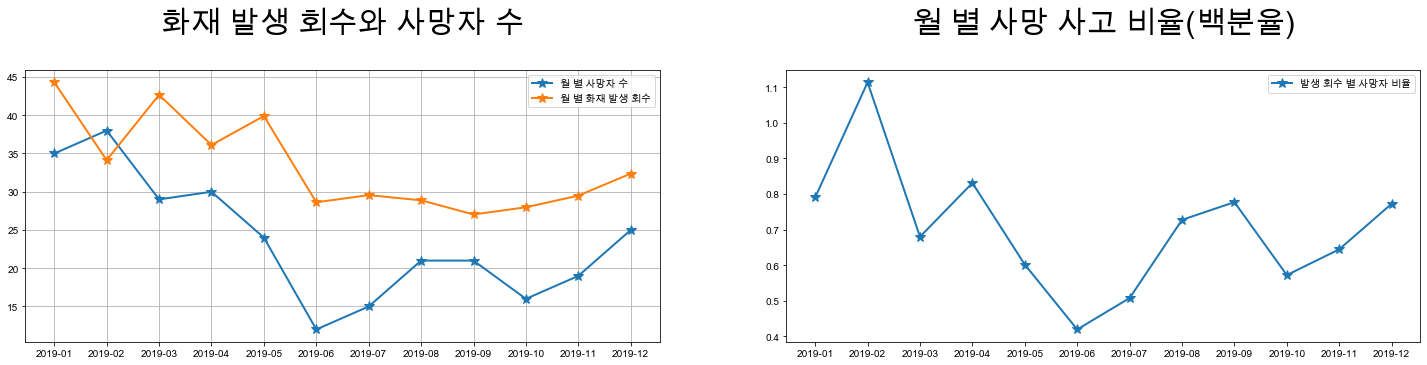

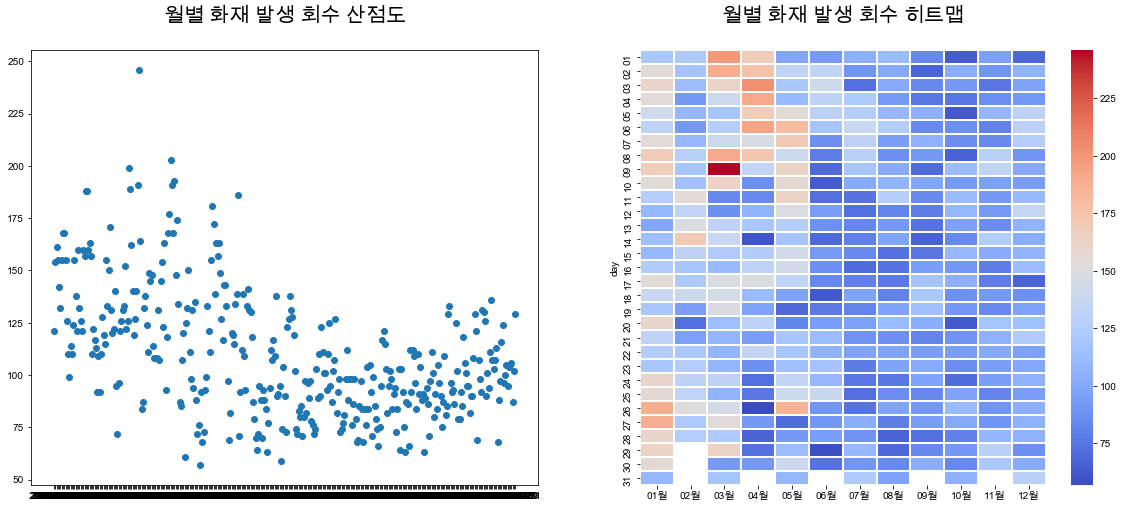

<Figure size 720x720 with 0 Axes>

In [48]:
# Figure 1
# 월 별 사망 사고 비율
plt.figure(figsize=(25,5))

plt.subplot(121)
plt.plot(df_sumByMonth.index, df_sumByMonth['사망'], marker='*',markersize=10,linewidth=2, label='월 별 사망자 수')
plt.plot(df_sumByMonth.index, df_sumByMonth['발생회수']/100, marker='*',markersize=10,linewidth=2, label='월 별 화재 발생 회수')
plt.grid(True)
plt.legend()
plt.xlabel(u'')
plt.title('화재 발생 회수와 사망자 수\n', size=30)


plt.subplot(122)
plt.plot(df_sumByMonth.index, (df_sumByMonth['사망']/df_sumByMonth['발생회수'])*100, marker='*',markersize=10,linewidth=2, label='발생 회수 별 사망자 비율')
plt.legend()
plt.xlabel(u'')
plt.title('월 별 사망 사고 비율(백분율)\n', size=30)



# Figure 2
figure2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))


# 일별 부상, 사망자, 발생 회수

df_Cnt = data.groupby(data['onlyDay']).sum().iloc[:,[1,2]]
df_Cnt['발생회수'] = data['onlyDay'].groupby(data['onlyDay']).count()
ax1.scatter(df_Cnt.index, df_Cnt['발생회수'])
ax1.set_title('월별 화재 발생 회수 산점도\n', size=20)


df_DayCount = pd.DataFrame()
monthFilter = ['01월','02월','03월','04월','05월','06월','07월','08월','09월','10월','11월','12월']
for i in monthFilter:
    mask = ( data.month== i )
    df_temp = data.loc[mask, ['사망']].groupby(data['day']).count()
    df_DayCount = df_DayCount.append(df_temp.T)
df_DayCount.index = monthFilter
plt.figure(figsize=(10,10))

ax2.set_title('월별 화재 발생 회수 히트맵\n', size=20)
sns.heatmap(df_DayCount.T, linewidths=1,cmap='coolwarm', ax=ax2)

# 2. 화재 유형 별 발생 비율과 재산 피해 비율
## 데이터 전처리 [ Fix ]

In [9]:
# Create DataFrame
df_dmgPerCase = data.groupby(data['화재유형']).sum()

# 화재 유형 별 화재 발생 건수
df_dmgPerCase['count'] = data['화재유형'].groupby(data['화재유형']).count()

# 화재 유형 별 건당 피해 액 수
df_dmgPerCase['건당피해'] = df_dmgPerCase['재산피해소계']/df_dmgPerCase['count']

# 필요한 열만 잘라내기
df_dmgPerCase = df_dmgPerCase.iloc[:,[0,3,4,5]]

# 정렬
df_srtDmgPerCase = df_dmgPerCase.sort_values('건당피해', ascending=False)

# 출력
df_srtDmgPerCase

,인명피해(명)소계,재산피해소계,count,건당피해
화재유형,,,,
"선박,항공기",27,60005851,108,555609.731481
"위험물,가스제조소등",19,6805927,29,234687.137931
임야,133,198547953,2211,89800.069199
"건축,구조물",1993,552840022,26025,21242.652142
"자동차,철도차량",177,32663468,4710,6934.918896
기타(쓰레기 화재등),166,7633013,7020,1087.323789


## 시각화 ( Pie )

Text(0, 0.5, '')

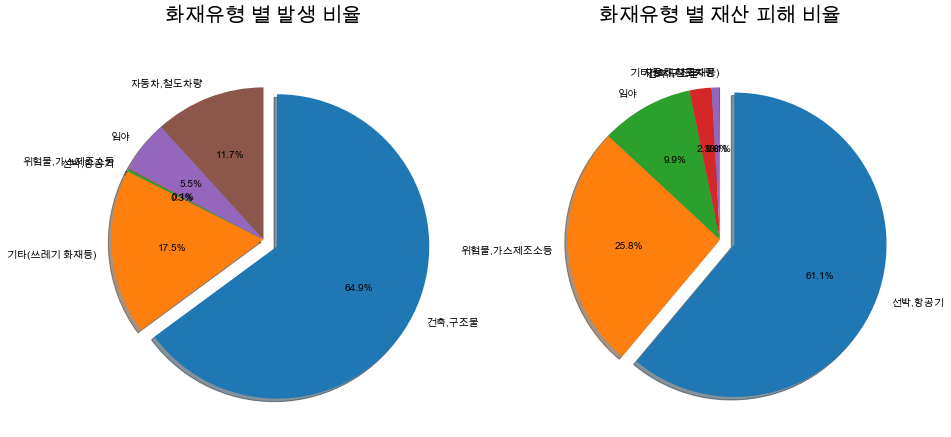

In [10]:
# Make figure
fig1= plt.figure()
# pie explode_value
explode_value = (0.1, 0, 0, 0, 0, 0)
# first chart location
ax2 = fig1.add_subplot(121)
# draw first pie chart
firepie = df_dmgPerCase['count'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2)
firepie.set_title("화재유형 별 발생 비율\n", fontsize=20)
firepie.set_ylabel("")

# second chart location
ax3 = fig1.add_subplot(122)
# draw second pie chart
damagepie = df_srtDmgPerCase['건당피해'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3)
damagepie.set_title("화재유형 별 재산 피해 비율\n", fontsize=20)
damagepie.set_ylabel("")

# 3. 착화물 별 데이터

## 데이터 전처리

In [11]:
# 날짜에서 달을 가져와서 +'월'로 붙여줌
data['month'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%m월')

In [12]:
# 중복된 데이터 제거하기
delDup = data.drop_duplicates('화재유형',keep='first') # 화재 유형 중복 제거

In [13]:
df_FstComplex = pd.DataFrame(index=delDup['최초착화물대분류'])
onlyDay = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20'
          ,'21','22','23','24','25','26','27','28','29','30','31']
for i in onlyDay:
    day = data.day == i
    df_firePerMonth = data.loc[day,:]
    dfTemp=df_firePerMonth['최초착화물대분류'].groupby(df_firePerMonth['최초착화물대분류']).count().to_frame()
    dfTemp = dfTemp.rename(columns={'최초착화물대분류':i})
    df_FstComplex = df_FstComplex.join(dfTemp)

In [14]:
df_FstComplex=df_FstComplex.iloc[[0,2,3,5],:]

In [15]:
df_FstComplex = df_FstComplex.apply(pd.to_numeric)
df_FstComplex['sum'] = df_FstComplex.sum(axis=1)

In [16]:
df_FstComplex=df_FstComplex.sort_values('sum', ascending=False)
df_FstComplex

,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,sum
최초착화물대분류,,,,,,,,,,,,,,,,,,,,,
"종이,목재,건초등",336,352,378,343,361,391,332,418,473,294,...,278,335,296,326,310,282,229,234,157,9484
합성수지,126,178,151,148,147,173,205,170,158,149,...,144,136,145,163,129,131,137,127,83,4472
미상,104,108,88,96,100,119,94,99,122,84,...,95,103,105,96,94,81,87,96,56,2969
위험물등,26,23,27,29,29,24,24,23,28,21,...,18,19,23,24,24,25,26,19,18,764


In [17]:
df_SecComplex = pd.DataFrame(index=delDup['최초착화물소분류'])
onlyDay = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20'
          ,'21','22','23','24','25','26','27','28','29','30','31']
for i in onlyDay:
    day = data.day == i
    df_firePerMonth = data.loc[day,:]
    dfTemp=df_firePerMonth['최초착화물소분류'].groupby(df_firePerMonth['최초착화물소분류']).count().to_frame()
    dfTemp = dfTemp.rename(columns={'최초착화물소분류':i})
    df_SecComplex = df_SecComplex.join(dfTemp)
    
df_SecComplex=df_SecComplex.iloc[[0,1,2,4],:]

df_SecComplex = df_SecComplex.apply(pd.to_numeric)
df_SecComplex['sum'] = df_SecComplex.sum(axis=1)

df_SecComplex = df_SecComplex.sort_values('sum', ascending=False)

Text(0, 0.5, '')

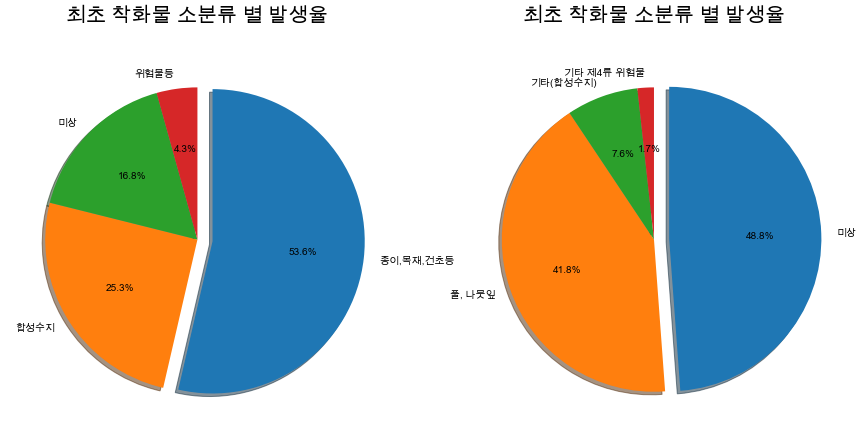

In [18]:
# Make figure
fig3= plt.figure()
# pie explode_value
explode_value = (0.1, 0, 0, 0)
# first chart location
ax3 = fig3.add_subplot(121)
# second chart location
ax4 = fig3.add_subplot(122)
# draw first pie chart
firepie = df_FstComplex['sum'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3)
firepie.set_title("최초 착화물 소분류 별 발생율\n", fontsize=20)
firepie.set_ylabel("")

secondpie = df_SecComplex['sum'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax4)
secondpie.set_title("최초 착화물 소분류 별 발생율\n", fontsize=20)
secondpie.set_ylabel("")

In [21]:
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,...,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth,day,month
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등",...,0,1,0,기타,야외,기타야외,2019-01-01,2019-01,01,01월
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,...,0,0,14900,주거,단독주택,단독주택,2019-01-01,2019-01,01,01월
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,...,0,0,3642,"자동차,철도차량",자동차,승용자동차,2019-01-01,2019-01,01,01월
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등",...,0,0,1848,기타,야외,야적장,2019-01-01,2019-01,01,01월
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자",...,0,0,45,기타서비스,기타건축물,기타 건축물,2019-01-01,2019-01,01,01월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",...,0,0,23707,산업시설,공장시설,제재 및 목공업,2019-12-31,2019-12,31,12월
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",...,0,0,3542,산업시설,동식물시설,기타 동식물시설,2019-12-31,2019-12,31,12월
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,...,0,0,0,"판매,업무시설",일반업무,오피스텔,2019-12-31,2019-12,31,12월
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,...,0,0,105,"판매,업무시설",판매시설,할인점(마트),2019-12-31,2019-12,31,12월


In [60]:
df_CntLoc=data['시도'].groupby(data['시도']).count()
df_CntLoc=df_CntLoc.sort_values(ascending=False)

Text(0, 0.5, '')

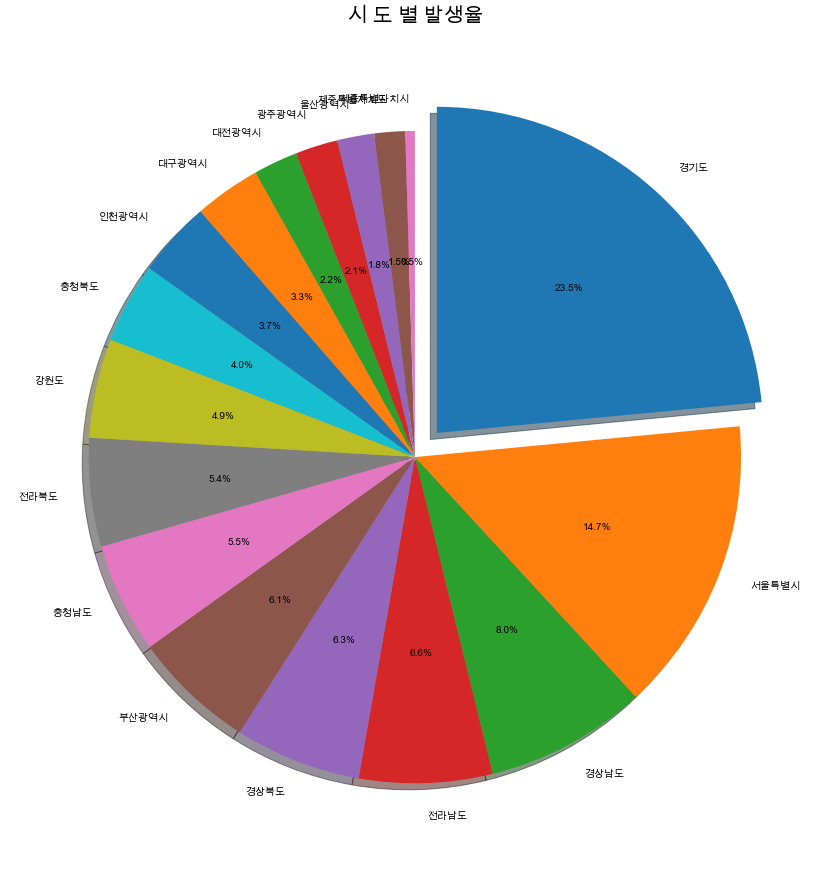

In [61]:
# Make figure
fig4= plt.figure()
ax5 = fig4.add_subplot(111)
explode_value = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0)
thirdpie = df_CntLoc.plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax5)
thirdpie.set_title("시 도 별 발생율\n", fontsize=20)
thirdpie.set_ylabel("")